# Thermoforming Machines- Defective Parts (K-Means Clustering)

## Project Description
Thermoforming is usually used to manufacture relatively simple geometries from thin plastic sheets. For example, the lids of disposable coffee cups, pill blister packaging, inexpensive plastic packaging, and large items such as bathtubs and internal door liners for refrigerators. Thermoforming is also used to manufacture large components such as automotive interior panels and small boat hulls. In thermoforming products, dimensional tolerances are typically less critical, and production has lower cost due to lower cost of thermoform tooling compared to injection mold tooling. <br>
Watch this short video: https://www.youtube.com/watch?v=alq3RDZN4jo <br>
##### AT UBC, FF219, we have 4 thermoforming machine. Students are allowed to use these machine. For example, you can make your own hat 🤠 or a Halloween Mask 🤖 or whatever 👓. Please let me know if you are interested in using these machines. 
This is how students made their Halloween Masks: https://www.youtube.com/watch?v=2AqNvkXJR54&t=4s <br>
##### Now, let's get back to ML. <br>
This is how the coffee cup lid are produced in a factory: https://www.youtube.com/watch?app=desktop&v=YI3Cwyx1tR8<br>

This factory has 200 thermoforming machines. Some of these machines are new and some are old from different brands. Each machine is identified with an ID number. The foreman is interested in analyzing the number of defective lids per day; to see if there is any pattern on how these machine performs. <br>
The file 'ThermoFormingDefectiveParts.csv' summarizes the average number of defective parts per day and the age of the machine (in month) for each machine. <br>
In order to start the investigation, the foreman wants to see if he can groups these machines to few groups. Try to see if you could cluster these machine to an optimum number of clusters.

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [3]:
dataset = pd.read_csv('ThermoFormingDefectiveParts.csv')
dataset

,MachineID,Period of Operations (Month),Number of Defective Parts Per Day
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


Text(0, 0.5, 'Number of Defective parts')

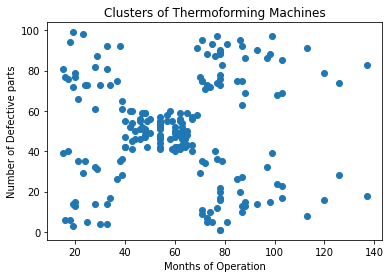

In [4]:
X = dataset.iloc[:, [1, 2]].values
plt.scatter(X[:,0:1],X[:,1:2])
plt.title('Clusters of Thermoforming Machines')
plt.xlabel('Months of Operation')
plt.ylabel('Number of Defective parts')

## Finding the Optimal Number of Clusters

### Elbow Method
In this method, WCSS (Within-Cluster Sum of Square), which is the sum of squared distance between each point and the centroid in a cluster, is used as a metric for finding the optimum number of cluster.<br>
In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10 here. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

C:\Users\mpanah\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


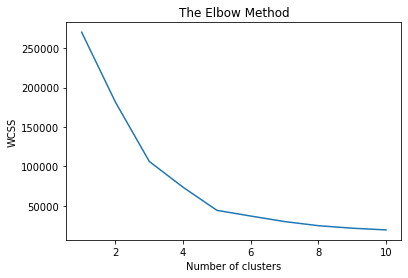

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Silhouette Score Method
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.<br>
1: Means clusters are well apart from each other and clearly distinguished.<br>
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.<br>
-1: Means clusters are assigned in the wrong way.<br>
silhouette score=(b-a)/(max⁡(a,b))  


In [17]:
from sklearn.metrics import silhouette_score

##### Finding the score for a certain number of cluster

In [18]:
# Finding the score for any number of clusters
i=7
km = KMeans(n_clusters=i, random_state=42)
km.fit_predict(X)
score = silhouette_score(X, km.labels_, metric='euclidean')
score

0.5264283703685728

##### Finding the score for a a range numbers of cluster & Plotting the scores

In [19]:
SH = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    SH.append(score)

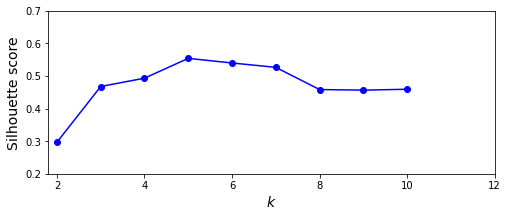

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), SH, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 12, 0.2, 0.7])
plt.show()

## Training the K-Means Model on the Dataset

In [22]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# Note: ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 

## Visualising the Clusters

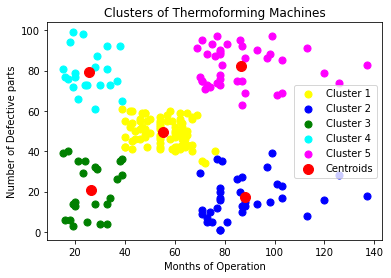

In [23]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title('Clusters of Thermoforming Machines')
plt.xlabel('Months of Operation')
plt.ylabel('Number of Defective parts')
plt.legend()
plt.show()